# Coleta e Inspeção Inicial





In [20]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Carregando o dataframe que será utilizado
df = pd.read_csv('heart_disease_uci.csv')

# Verificando os conteúdos e as estruturas do DataFrame
df.head(30)
df.info()

# Removendo a coluna ID e Dataset
df.drop('id', axis=1, inplace=True)
df.drop('dataset', axis=1, inplace=True)

# Verificando os NaNs para futura remoção
print(df.isna().any(),
df.info())

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145.0,233.0,1,2,150.0,0,2.3,1,0.0,fixed defect,0
1,67,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,normal,1
2,67,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,reversable defect,1
3,37,1,3,130.0,250.0,0,0,187.0,0,3.5,1,0.0,normal,0
4,41,0,2,130.0,204.0,0,2,172.0,0,1.4,3,0.0,normal,0
5,56,1,2,120.0,236.0,0,0,178.0,0,0.8,3,0.0,normal,0
6,62,0,4,140.0,268.0,0,2,160.0,0,3.6,1,2.0,normal,1
7,57,0,4,120.0,354.0,0,0,163.0,1,0.6,3,0.0,normal,0
8,63,1,4,130.0,254.0,0,2,147.0,0,1.4,2,1.0,reversable defect,1
9,53,1,4,140.0,203.0,1,2,155.0,1,3.1,1,0.0,reversable defect,1


# **Pré - Processamento de Dados**


Será feito pequenas alterações sobre algumas colunas no DataFrame e processamento dos dados ao Sklearn


In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Removendo colunas que não são preditivas
if 'id' in df.columns:
    df.drop(['id', 'dataset'], axis=1, inplace=True)

# Mapeamento manual
mapas = {
    'sex': {'Male': 1, 'Female': 0, 'M': 1, 'F': 0},
    'cp': {'typical angina': 1, 'atypical angina': 2, 'non-anginal': 3, 'asymptomatic': 4},
    # Tratando True/False como texto e como booleano para garantir
    'exang': {False: 0, True: 1, 'False': 0, 'True': 1, 'nan': 0},
    'fbs': {False: 0, True: 1, 'False': 0, 'True': 1, 'nan': 0},
    'slope': {'downsloping': 1, 'flat': 2, 'upsloping': 3},
    'restecg': {'normal': 0, 'st-t abnormality': 1, 'lv hypertrophy': 2}
}

print("Aplicando mapeamentos...")
for col, mapa in mapas.items():
    if col in df.columns:
        # Convertendo para int para garantir
        df[col] = df[col].map(mapa).fillna(0).astype(int)

# Binarizando o alvo (0 = Saudável, 1 = Doente)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Divisão de Treino e Teste
X = df.drop('num', axis=1)
y = df['num']

# Stratify garante que a proporção de doentes seja a mesma no treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Imputação
cols_para_preencher = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Calculamos a mediana SÓ no treino
medianas_treino = X_train[cols_para_preencher].median()

# Aplicamos no treino e no teste
X_train[cols_para_preencher] = X_train[cols_para_preencher].fillna(medianas_treino)
X_test[cols_para_preencher] = X_test[cols_para_preencher].fillna(medianas_treino)

# Encoding final
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Alinhamento (Garante que treino e teste tenham as mesmas colunas)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Salvando nomes das colunas
nomes_features = X_train.columns.tolist()

# Escalonamento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verificação Final
print("\nProcessamento Concluído com Sucesso!")
print(f"Shape do Treino: {X_train.shape}")
print(f"Shape do Teste: {X_test.shape}")
print(f"Colunas Salvas: {len(nomes_features)}")
print("\nPrimeiras 5 linhas do DataFrame transformado (Para conferência):")
display(df.head())

Aplicando mapeamentos...

Processamento Concluído com Sucesso!
Shape do Treino: (736, 14)
Shape do Teste: (184, 14)
Colunas Salvas: 14

Primeiras 5 linhas do DataFrame transformado (Para conferência):


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145.0,233.0,1,2,150.0,0,2.3,1,0.0,fixed defect,0
1,67,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,normal,1
2,67,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,reversable defect,1
3,37,1,3,130.0,250.0,0,0,187.0,0,3.5,1,0.0,normal,0
4,41,0,2,130.0,204.0,0,2,172.0,0,1.4,3,0.0,normal,0




---


# **Análise Exploratória de Dados (EDA)**



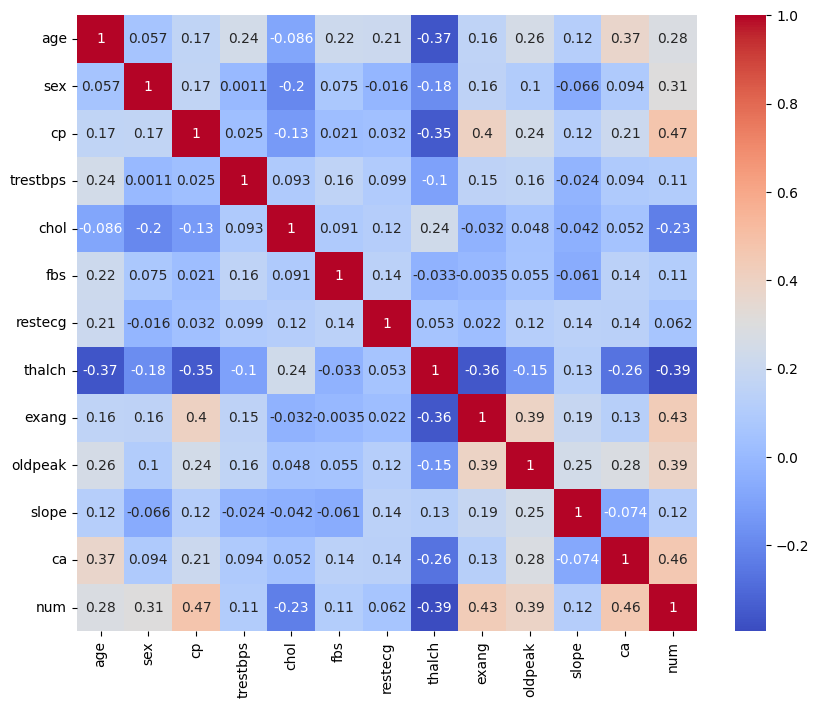

<Axes: >

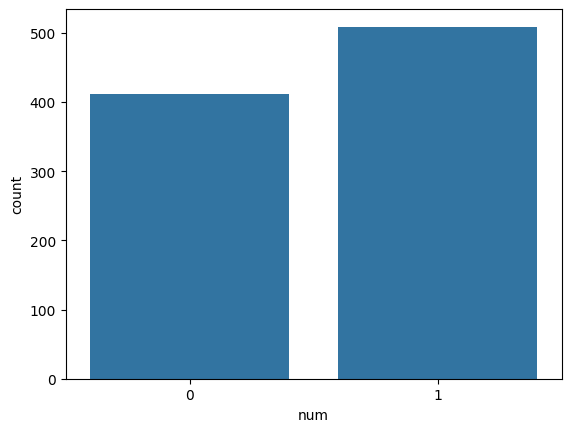

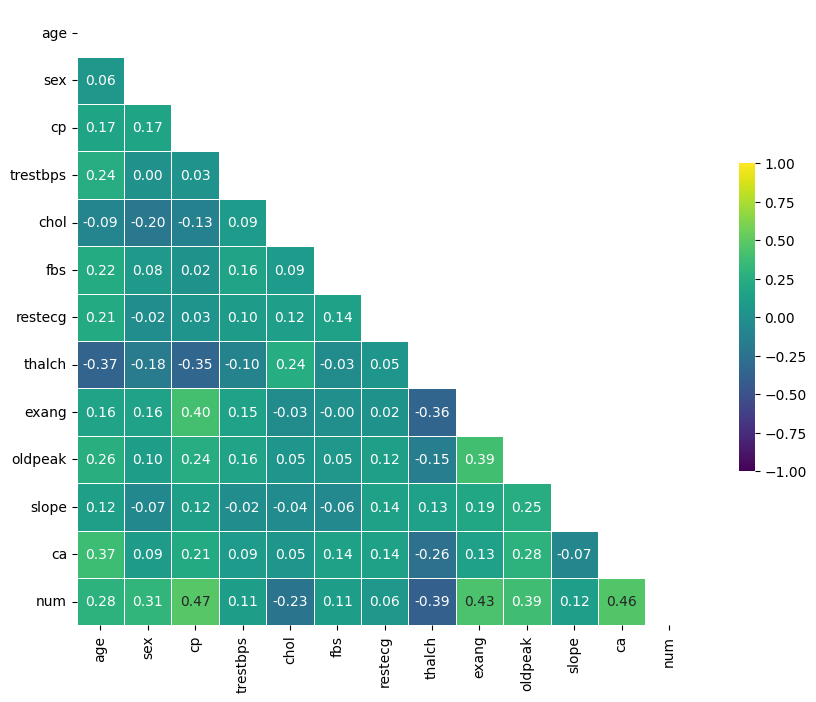

In [15]:
# Implementação das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# Mapas de Calor de Correlação
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.show()

# Verificação de Balanceamento entre classes
sns.countplot(x='num', data=df)

# Mascaramento de dados e heatmap
plt.figure(figsize=(12,8))
df1 = df.select_dtypes(include=np.number)
matriz_correlacao = df1.corr()
mascara = np.triu(np.ones_like(matriz_correlacao, dtype=bool))
sns.heatmap(matriz_correlacao,
            mask=mascara,
            cmap='viridis',
            vmax=1, vmin=-1,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            annot=True,
            fmt=".2f"
           )





---


#**Desenvolvimento do Modelo com Random Forest**





In [16]:
from sklearn.ensemble import RandomForestClassifier

# Instanciando o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Prevendo
y_pred = model.predict(X_test)



---

# **Avaliação do Modelo**

Acurácia Global: 0.8586956521739131

Relatório Detalhado:

              precision    recall  f1-score   support

           0       0.87      0.80      0.84        82
           1       0.85      0.90      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



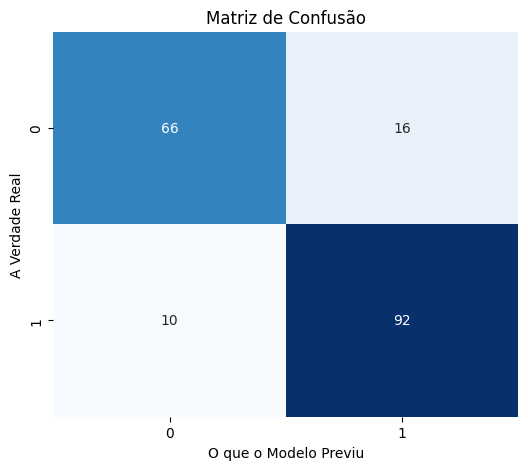

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

# Dados do relatório matemático
print("Acurácia Global:", accuracy_score(y_test, y_pred))
print("\nRelatório Detalhado:\n")
print(classification_report(y_test, y_pred))

# Criando a Matriz de Confusão visual
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('O que o Modelo Previu')
plt.ylabel('A Verdade Real')
plt.title('Matriz de Confusão')
plt.show()



---


#  **Utilização da Biblioteca "SHAP" para explicação dos fatores que levam ao risco**

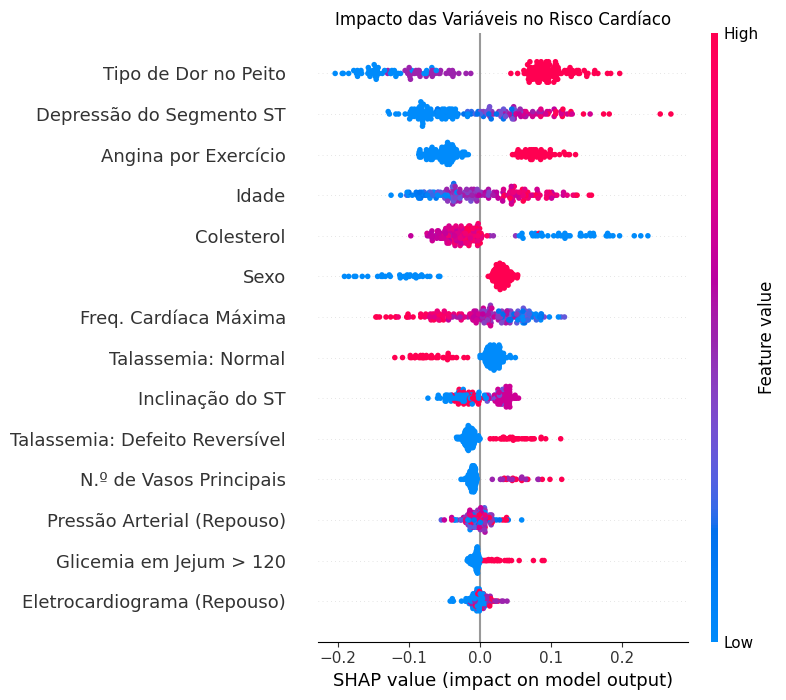

In [19]:
import shap

dicionario_legenda = {
    'age': 'Idade',
    'sex': 'Sexo',
    'cp': 'Tipo de Dor no Peito',
    'trestbps': 'Pressão Arterial (Repouso)',
    'chol': 'Colesterol',
    'fbs': 'Glicemia em Jejum > 120',
    'restecg': 'Eletrocardiograma (Repouso)',
    'thalch': 'Freq. Cardíaca Máxima',
    'exang': 'Angina por Exercício',
    'oldpeak': 'Depressão do Segmento ST',
    'slope': 'Inclinação do ST',
    'ca': 'N.º de Vasos Principais',
    'thal_fixed defect': 'Talassemia: Defeito Fixo',
    'thal_normal': 'Talassemia: Normal',
    'thal_reversable defect': 'Talassemia: Defeito Reversível',
    'slope_flat': 'Inclinação ST: Plana',
    'slope_upsloping': 'Inclinação ST: Subida'
}

# Criando a lista de nomes traduzidos
nomes_descritivos = [dicionario_legenda.get(col, col) for col in nomes_features]

# Calculando SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Ajuste Automático de Dimensão
if isinstance(shap_values, list)
    vals = shap_values[1]

elif len(shap_values.shape) == 3
    vals = shap_values[:, :, 1]

else:
    # Se for 2D direto
    vals = shap_values

# Gerando o Gráfico Beeswarm
plt.title("Impacto das Variáveis no Risco Cardíaco")
shap.summary_plot(vals, X_test, feature_names=nomes_descritivos)